Proposta de solução para a Lista 2. Disciplina de Tópicos Especiais em Computação VIII (DIM0097) - Turma 1, ministrada por Antonio Carlos Gay Thome.

Jupyter Notebook por Luiz Fernando Carbonera Filho e Mateus de Assis Silva. Para mais informações sobre as atividades desenvolvidas para o curso, favor acessar:



*   [Repositório de Mateus Assis](https://github.com/mtxslv/DIMAP_tec8)
*   [Repositório de Fernando Carbonera](https://github.com/Lufec/TopEspCompVIII)



# Preparação dos dados...

##Importações de dados e configurações de print:

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
np.set_printoptions(precision = 5,edgeitems = 11, linewidth = 200, suppress = True)
np.core.arrayprint._line_width = 180

## Importação de dados e algumas formatações:

In [6]:
ds = pd.read_excel("https://github.com/Lufec/TopEspCompVIII/raw/master/Lista2_Conjunto1.xlsx", skiprows = 2).drop(columns = 
    ["Unnamed: 0","Unnamed: 1","Unnamed: 8"])

ds = ds.dropna()
ds.head(10)

,V1,V2,V3,V4,V5,V6,Classe
0,5.1,3.5,4.95,1.4,1.96,0.2,1
1,4.9,3.0,5.30,1.4,1.96,0.2,1
2,4.7,3.2,4.60,1.3,1.69,0.2,1
3,4.6,3.1,4.55,1.5,2.25,0.2,1
4,5.0,3.6,4.60,1.4,1.96,0.2,1
5,5.4,3.9,4.95,1.7,2.89,0.4,1
6,4.6,3.4,4.10,1.4,1.96,0.3,1
7,5.0,3.4,4.90,1.5,2.25,0.2,1
8,4.4,2.9,4.45,1.4,1.96,0.2,1
9,4.9,3.1,5.15,1.5,2.25,0.1,1


In [0]:
# separando as features e o target

inputs = ds.drop(columns = "Classe")
outputs = ds["Classe"]

In [0]:
# transformando os dados em uma lista

col = []
col.append(ds["V1"].to_numpy())
col.append(ds["V2"].to_numpy())
col.append(ds["V3"].to_numpy())
col.append(ds["V4"].to_numpy())
col.append(ds["V5"].to_numpy())
col.append(ds["V6"].to_numpy())
col.append(ds["Classe"].to_numpy())
col = np.asarray(col)

#Tarefas



##1) Conjunto Dados1–Analise os dados brutos no sentido de verificar:

a.Eventual existência de colinearidade; distribuição, escala e correlação. 

b.O grau de normalidade da distribuição. 

c.A existência ou não de outliers e falta de medidas. 

d.A escala dos diferentes atributos.

e.A correlação existente.

In [9]:
# checando a distribuição de elementos nas classes.

frequencies = []
for i in range(0,len(col)):
    (unique, counts) = np.unique(col[i], return_counts=True)
    freq = np.asarray((unique, counts)).T
    soma = freq[:,1].sum()
    freq[:,1] = 100*freq[:,1]/soma
    frequencies.append(freq)

# como pode ser visto, as 3 classes estão bem representadas(~1/3 para cada classe).    
print(frequencies[6])

[[ 1.      33.33333]
 [ 2.      33.33333]
 [ 3.      33.33333]]


In [10]:
# agora checa-se a escala das features

maximo = [] # valores máximos para cada feature
minimo = [] # valores mínimos para cada feature
escala = [] # a variação de valor para cada feature
for i in range(0,len(col)):
    maximo.append(max(col[i]))
    minimo.append(min(col[i]))
    escala.append(max(col[i])-min(col[i]))


# como pode ser visto abaixo, a escala da quinta feature é a mais distinta,
# estando essa uma ordem de magnitude a mais que todas as outras
escala    

[3.6000000000000005,
 2.4000000000000004,
 7.700000000000001,
 5.9,
 46.61000000000001,
 2.4,
 2.0]

In [11]:
# Checando a correlação existente #
# como se pode ver na matriz abaixo, todos os atributos apresentam uma correlação
# notável. Entretanto, a segunda variável é a única que não apresenta uma 
# correlação muito forte com nenhuma das outras variáveis. 
# Isso implica que as outras variáveis se não a segunda apresentam uma alta colinearidade.

cor = np.corrcoef(inputs, rowvar = False)
print(cor)

[[ 1.      -0.11757  0.93644  0.87175  0.89752  0.81794]
 [-0.11757  1.      -0.4585  -0.42844 -0.34149 -0.36613]
 [ 0.93644 -0.4585   1.       0.9315   0.92383  0.86132]
 [ 0.87175 -0.42844  0.9315   1.       0.98382  0.96287]
 [ 0.89752 -0.34149  0.92383  0.98382  1.       0.94592]
 [ 0.81794 -0.36613  0.86132  0.96287  0.94592  1.     ]]


In [12]:
#Teste de normalidade de Shapiro-Wilk
#s: valor estatistico W: mais perto de 1 = mais parecido com gaussiana
#p: valor alpha. Usado para teste de hipótese (neste caso, se p<0.5, rejeita hipótese de ser gaussiana, como caso col6)

for i in range(0,len(col)-1):
  s,p = stats.shapiro(col[i])
  print("para feature numero ", i," :")
  print("    W[",i,"]: ", round(s,2))
  print("    a[",i,"]: ", round(p,5))
  if p<0.05:
    print("    feature ",i," nao gaussiana.")
  else:
    print("    feature ",i," gaussiana.")

para feature numero  0  :
    W[ 0 ]:  0.98
    a[ 0 ]:  0.01018
    feature  0  nao gaussiana.
para feature numero  1  :
    W[ 1 ]:  0.98
    a[ 1 ]:  0.10113
    feature  1  gaussiana.
para feature numero  2  :
    W[ 2 ]:  0.95
    a[ 2 ]:  8e-05
    feature  2  nao gaussiana.
para feature numero  3  :
    W[ 3 ]:  0.88
    a[ 3 ]:  0.0
    feature  3  nao gaussiana.
para feature numero  4  :
    W[ 4 ]:  0.91
    a[ 4 ]:  0.0
    feature  4  nao gaussiana.
para feature numero  5  :
    W[ 5 ]:  0.9
    a[ 5 ]:  0.0
    feature  5  nao gaussiana.


In [13]:
# Pra saber se falta medidas, basta contar quantos elementos existem em cada atributo
# e ver se são todos iguais

elementos = []
for i in range(0, len(col)):
  elementos.append(len(col[i]))

elementos

[150, 150, 150, 150, 150, 150, 150]

<function matplotlib.pyplot.show>

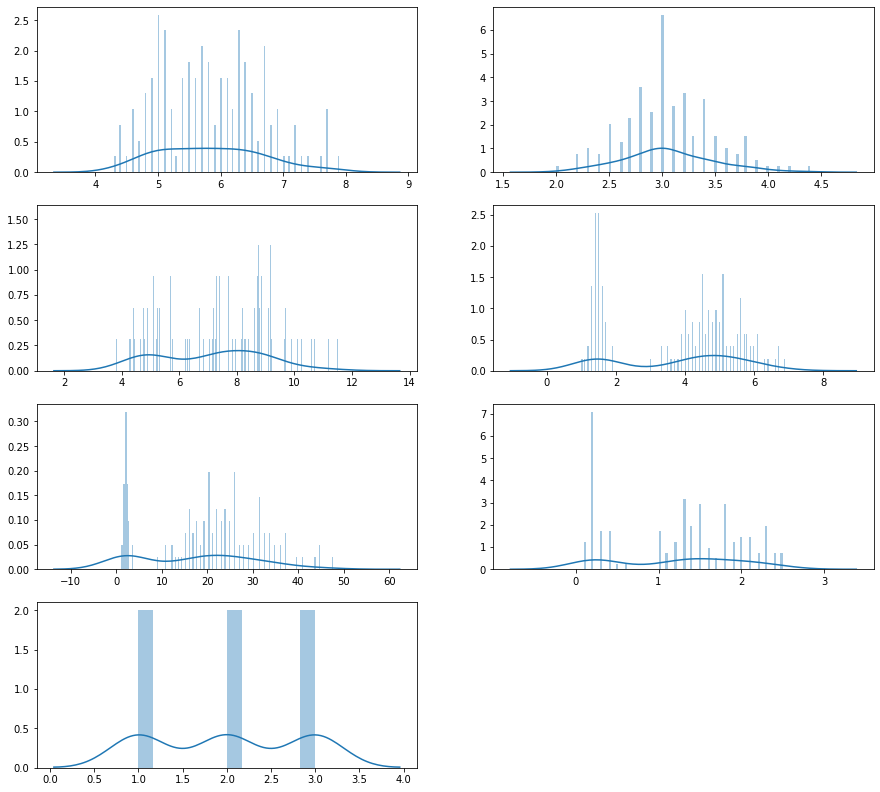

In [14]:
#por fim, pra checar os outliers... basta plotar um histograma e usar o olhômetro

plt.figure(figsize=(15,14))
plt.subplot(421)
sns.distplot(col[0],bins = 4*len(set(col[0])))
plt.subplot(422)
sns.distplot(col[1],bins = 4*len(set(col[1])))
plt.subplot(423)
sns.distplot(col[2],bins = 4*len(set(col[2])))
plt.subplot(424)
sns.distplot(col[3],bins = 4*len(set(col[3])))
plt.subplot(425)
sns.distplot(col[4],bins = 4*len(set(col[4])))
plt.subplot(426)
sns.distplot(col[5],bins = 4*len(set(col[5])))
plt.subplot(427)
sns.distplot(col[6],bins = 4*len(set(col[6])))

plt.show

##2) Conjunto Dados1–Trate os dados brutos no sentido de transformá-los  em descritores:

a.Normalize o conjunto de dados.

b.Calcule os Autovetores e os Autovalores do conjunto de dados.

c.Descorrelacione  o conjunto de dados.

d.Verifique se há condições de redução dadimensão do problema.

e.Transforme  o conjunto original  de forma a descorrelacioná-lo  e reduzi-lo,  se possível.

f.Transforme agora o conjunto de dados usando a função PCA disponibilizada emsua plataforma e compare com o resultado obtido no item anterior.Comente e justifique caso sejam  diferentes.

In [0]:
col_norm = StandardScaler().fit_transform(inputs) #a)

In [16]:
features = col_norm #b)
cov = np.cov(features, rowvar = False)
aval, avet = np.linalg.eig(cov)
print("Autovetores: \n",avet)
print("Autovalores: \n",aval)

Autovetores: 
 [[ 0.41643 -0.34163 -0.5125  -0.17666 -0.64489  0.0115 ]
 [-0.19853 -0.93426  0.1323   0.02096  0.25459 -0.0706 ]
 [ 0.4428   0.02434 -0.50537 -0.16549  0.72063  0.03523]
 [ 0.4508   0.00657  0.2458   0.2842  -0.      -0.80966]
 [ 0.4472  -0.09214  0.20562  0.67139  0.       0.54634]
 [ 0.43346 -0.03633  0.60145 -0.63987  0.       0.19903]]
Autovalores: 
 [ 4.843    0.93025  0.2171   0.04067 -0.       0.00924]


In [0]:
# Para descorrelacionar os dados, basta os projetar nos autovetores
# para testar se estão descorrelacionados, veja se a covariância de col_norm_decorrelated
# é uma matriz diagonal

col_norm_decorrelated = np.dot(col_norm,avet).T # c) 

In [18]:
# Note que os dois primeiros autovalores correspondem a 95% da varição dos dados
# Ou seja, os dois primeiros autovetores correspondem a 95% da informação contida 
# nos dados que temos. Logo, pode-se reduzir a dimensão dos dados sem muito dano.

percentagem = aval/sum(aval) # d)
percentagem

array([ 0.80179,  0.15401,  0.03594,  0.00673, -0.     ,  0.00153])

In [0]:
# Define-se uma nova base pro espaço, composta apenas dos dois primeiros autovetores
# os quais representam 95% da informação contida. Depois projeta-se os dados nessa base
# Os novos dados estarão reduzidos a duas dimensões, além de descorrelacionados.
# Para se checar, basta ver a matriz de covariância dos novos dados. Ela deve ser 2x2 e diagonal.

new_avet = avet[:,0:2] # nova base composta pelos dois principais autovetores
new_col_norm_decorr = np.dot(col_norm,new_avet).T # e)

In [0]:
result = pd.DataFrame(col_norm_decorrelated[0], columns=['PC1']) #e) Só importa PC1 e PC2, somados = 95% informação
result['PC2'] = col_norm_decorrelated[1]       
result['Classe'] = outputs            

Text(0.5, 1.0, 'Resultado do PCA')

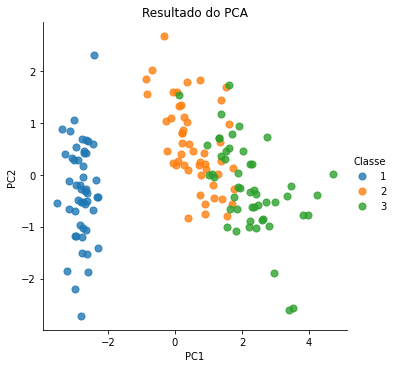

In [21]:
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False, #e), plotado
           scatter_kws={"s": 50},
           hue="Classe")

plt.title('Resultado do PCA')

In [32]:
pca = PCA(n_components =2, svd_solver = 'full') #f) usando PCA do scikit
pca.fit(col_norm)
inp2 = pca.transform(col_norm)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
inp2 = inp2.T
result2 = pd.DataFrame(inp2[0], columns=['PC1'])
result2['PC2'] = inp2[1]
result2['Classe'] = outputs

[0.80179 0.15401]
[26.86273 11.77317]


Text(0.5, 1.0, 'Resultado do PCA')

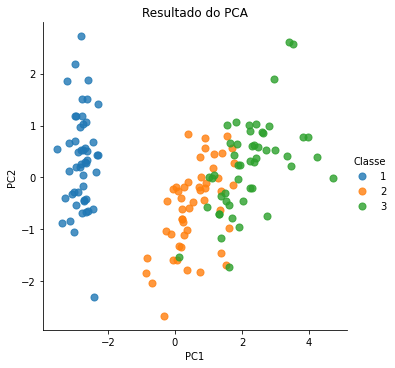

In [33]:
sns.lmplot('PC1', 'PC2', data=result2, fit_reg=False, #f)plotado.
           scatter_kws={"s": 50},
           hue="Classe")

plt.title('Resultado do PCA')

In [0]:
# Os gráficos de PCA gerados estão diferentes entre si. Note que estão 
# invertidos quanto a variável PC2 Isto é, se multiplicarmos a coluna 
# inp2[1] por (-1), os gráficos serão semelhantes. A razão dessa plotagem
# é desconhecida.

##3) Conjunto Dados1–Realize as operações solicitadas:

a.Após a normalização  do conjunto de dados, calcule a matriz de covariância.

b.Com base na covariância, selecione os dois atributos que aparentemente oferecem o maior nível de informaçãoe verifique, graficamente,como ficaria a posição espacial das 3 classes.

c.Com base agora no conjunto descorrelacionado, gerado em 2.c, selecioneos 2 descritores que oferecem o maior  nível  de informação e verifique, graficamente,como ficaria a posição espacial das 3 classes.

d.Compare, visualmente, em qual dos dois casos a construção de um modelo computacional terá, provavelmente, uma possibilidade maior de sucesso.Justifique

In [35]:
ds_norm = []
for i in ds.columns:
  ds_norm.append((ds[i]-ds[i].mean())/ds[i].std())

cov3 = np.cov(ds_norm,rowvar = True) #a)Estranho que não tava dando 1 na diagonal principal...
np.shape(cov3)                         
print(cov3)

[[ 1.      -0.11757  0.93644  0.87175  0.89752  0.81794  0.78256]
 [-0.11757  1.      -0.4585  -0.42844 -0.34149 -0.36613 -0.42666]
 [ 0.93644 -0.4585   1.       0.9315   0.92383  0.86132  0.85105]
 [ 0.87175 -0.42844  0.9315   1.       0.98382  0.96287  0.94903]
 [ 0.89752 -0.34149  0.92383  0.98382  1.       0.94592  0.93933]
 [ 0.81794 -0.36613  0.86132  0.96287  0.94592  1.       0.95655]
 [ 0.78256 -0.42666  0.85105  0.94903  0.93933  0.95655  1.     ]]


Text(0.5, 1.0, 'Distribuição e Classes')

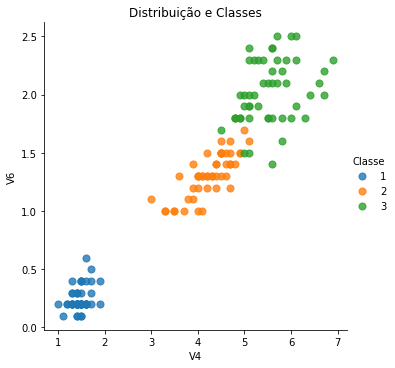

In [36]:
sns.lmplot('V4', 'V6', data=ds, fit_reg=False,   #b)Maiores cov entre os V's e a Classe..
           scatter_kws={"s": 50},                #Pra classificar dá pra usar desigualdades
           hue="Classe")
plt.title('Distribuição e Classes')

In [37]:
features_proj = col_norm_decorrelated                #c)Conjunto descorrelacionado gerou base canonica (como esperado)
cov_proj = np.cov(features_proj, rowvar = True)
aval_proj, avet_proj = np.linalg.eig(cov_proj)
print("Autovetores: \n",avet_proj)
print("Autovalores: \n",aval_proj)

Autovetores: 
 [[-1.  0. -0.  0. -0. -0.]
 [ 0.  1.  0.  0.  0. -0.]
 [-0. -0.  1.  0. -0. -0.]
 [-0.  0.  0. -1.  0. -0.]
 [-0. -0.  0.  0.  1. -0.]
 [-0.  0.  0. -0. -0.  1.]]
Autovalores: 
 [4.843   0.93025 0.2171  0.04067 0.      0.00924]


Text(0.5, 1.0, 'Resultado do PCA')

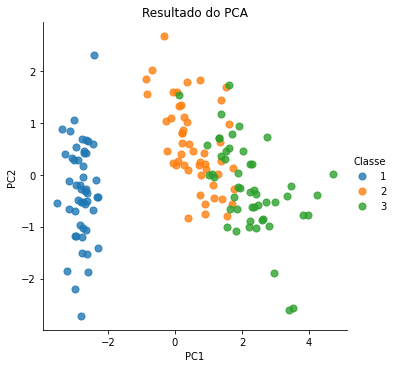

In [38]:
result3 = pd.DataFrame(features_proj[0], columns=['PC1'])
result3['PC2'] = features_proj[1]
result3['Classe'] = outputs

sns.lmplot('PC1', 'PC2', data=result3, fit_reg=False,
           scatter_kws={"s": 50},
           hue="Classe")

plt.title('Resultado do PCA')

Text(0.5, 1.0, 'Resultado do PCA')

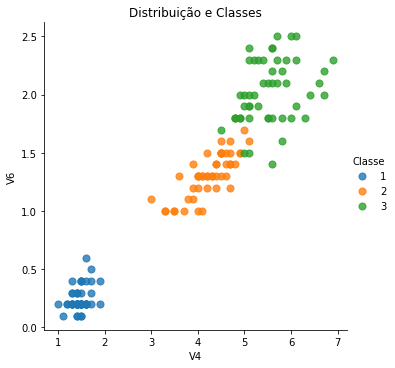

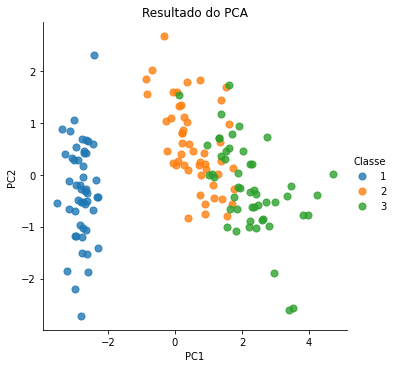

In [39]:
sns.lmplot('V4', 'V6', data=ds, fit_reg=False,   
           scatter_kws={"s": 50},                
           hue="Classe")
plt.title('Distribuição e Classes')

sns.lmplot('PC1', 'PC2', data=result3, fit_reg=False,
           scatter_kws={"s": 50},
           hue="Classe")

plt.title('Resultado do PCA')

In [0]:
# Pelo que pode ser observado acima, os descritores a serem utilizados 
# são os atributos originais V4 e V6, ao invés dos transformados PC1 e PC2.
# Isso porque os atributos originais estão melhor separados em clusters.
# Enquanto isso, os atributos transformados estão menos agrupados ("mais
# misturados").